In [53]:
import numpy

In [54]:
!head land_global_temperature_annomaly-1880-2015.csv

Global Land Temperature Anomalies
Units: Degrees Celsius
Base Period: 1901-2000
Year,Value
188001,-0.1538
188002,-0.5771
188003,-0.7250
188004,-0.2990
188005,-0.2098
188006,-0.3002


In [71]:
pyplot.rcdefaults()

In [55]:
T_land = numpy.loadtxt(fname='land_global_temperature_annomaly-1880-2015.csv', delimiter=',', skiprows=4)

In [56]:
print(T_land)

[[  1.88001000e+05  -1.53800000e-01]
 [  1.88002000e+05  -5.77100000e-01]
 [  1.88003000e+05  -7.25000000e-01]
 ..., 
 [  2.01510000e+05   1.32120000e+00]
 [  2.01511000e+05   1.28280000e+00]
 [  2.01512000e+05   1.87220000e+00]]


In [57]:
numpy.shape(T_land)

(1632, 2)

In [58]:
int(1632/12)

136

In [73]:
from matplotlib import pyplot
%matplotlib inline

In [60]:
T_land[0]

array([  1.88001000e+05,  -1.53800000e-01])

In [61]:
T_land[:,1]

array([-0.1538, -0.5771, -0.725 , ...,  1.3212,  1.2828,  1.8722])

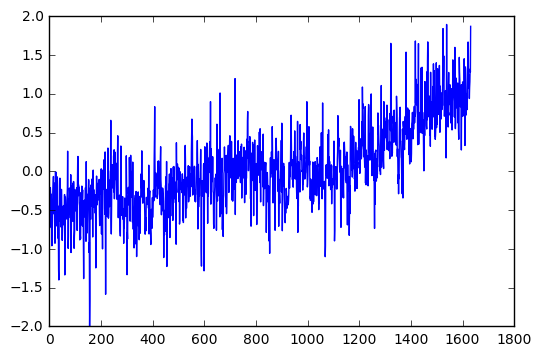

In [74]:
pyplot.plot(T_land[:,1])

In [16]:
#Remember that to remove the ugly line at the beginning of the plot we use a ; at the end of the plot.

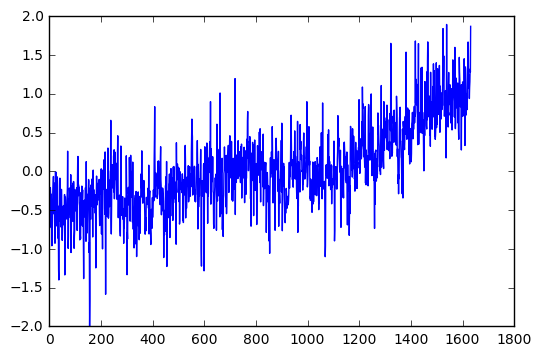

In [35]:
pyplot.plot(T_land[:,1]);

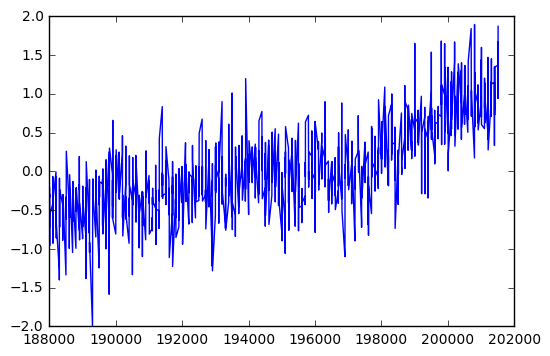

In [36]:
pyplot.plot(T_land[:,0],T_land[:,1]);

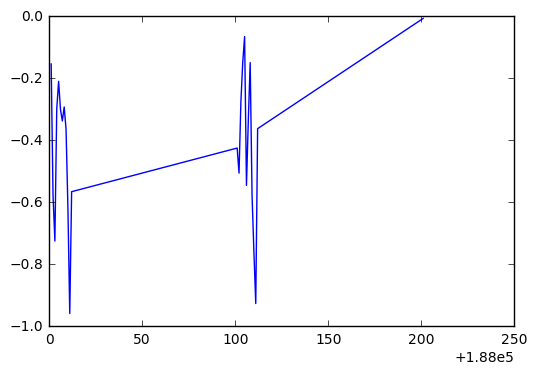

In [75]:
pyplot.plot(T_land[0:25,0],T_land[0:25,1]);

# Using numpy.arrange() for creating our date-array

In [32]:
date = numpy.arange('1880','2016', dtype=('datetime64[M]'))

In [33]:
print(date)

['1880-01' '1880-02' '1880-03' ..., '2015-10' '2015-11' '2015-12']


In [37]:
len(date)

1632

In [38]:
dummy = numpy.linspace(1,1632, 1632)

In [42]:
print(dummy)

[  1.00000000e+00   2.00000000e+00   3.00000000e+00 ...,   1.63000000e+03
   1.63100000e+03   1.63200000e+03]


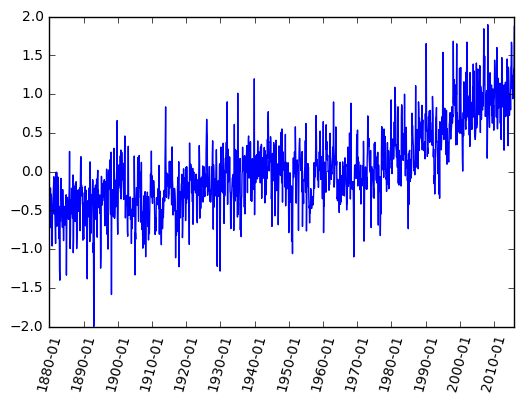

In [76]:
pyplot.xticks(dummy[::12*10], date[::12*10], rotation=75)
pyplot.plot(dummy, T_land[:,1]);

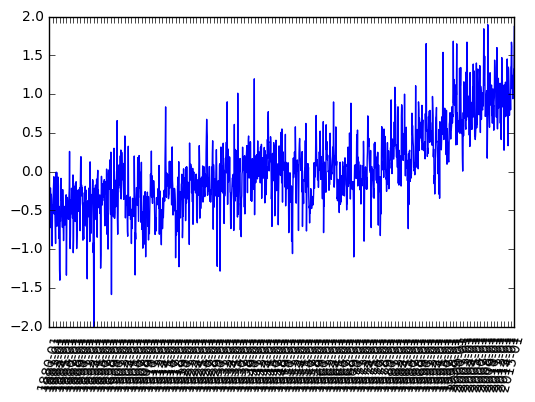

In [48]:
pyplot.xticks(dummy[::12], date[::12], rotation=75)
pyplot.plot(dummy, T_land[:,1]);

In [77]:
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

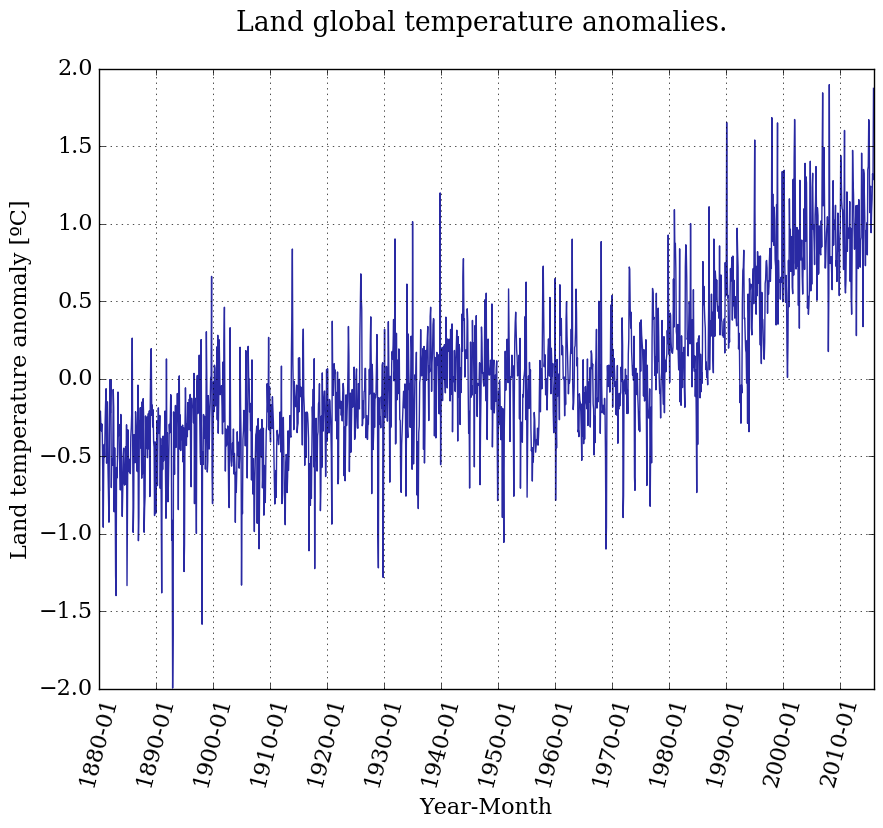

In [83]:
pyplot.figure(figsize=(10,8))
pyplot.xticks(dummy[::12*10], date[::12*10], rotation = 75)
pyplot.plot(dummy, T_land[:,1], color = '#2929a3', linestyle = '-', linewidth = 1)
pyplot.title('Land global temperature anomalies. \n')
pyplot.xlabel('Year-Month')
pyplot.ylabel('Land temperature anomaly [ºC]')
pyplot.grid()
pyplot.savefig('temp_anomalies.eps');

## Histograms

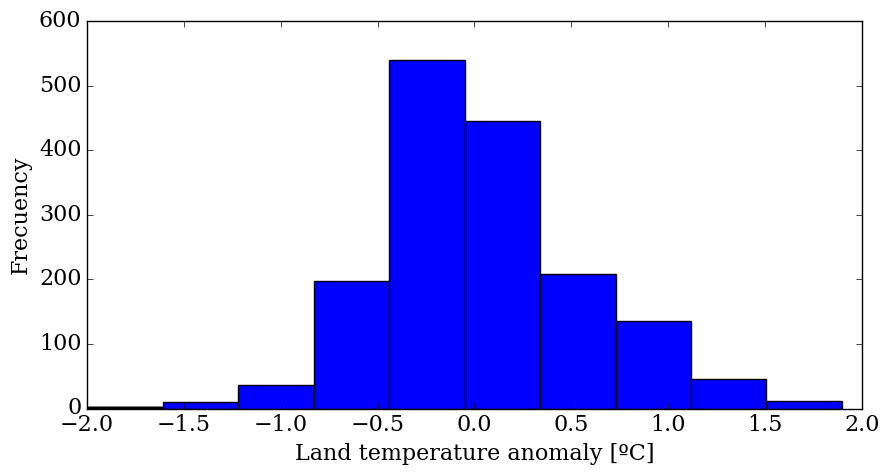

In [84]:
pyplot.figure(figsize=(10,5))
pyplot.hist(T_land[:,1])
pyplot.xlabel('Land temperature anomaly [ºC]')
pyplot.ylabel('Frecuency');

### Normalized Histogram

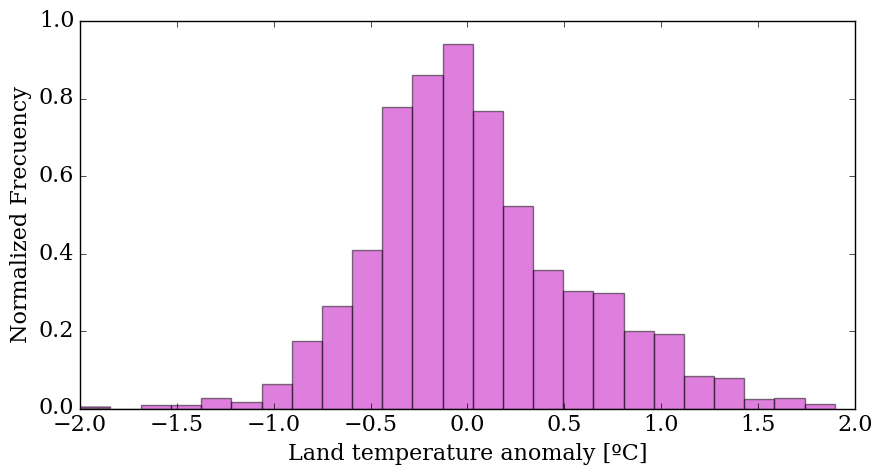

In [86]:
pyplot.figure(figsize=(10,5))
pyplot.hist(T_land[:,1], bins=25, normed=True, color='m', alpha = 0.5)
pyplot.xlabel('Land temperature anomaly [ºC]')
pyplot.ylabel('Normalized Frecuency');

## Let's do some stats

In [102]:
mean_T = numpy.mean(T_land[:,1])
median_T = numpy.median(T_land[:,1])

print('The mean value is {:.5} and the median is {:.5}'.format(mean_T, median_T))

The mean value is 0.04031 and the median is -0.0276


In [105]:
variance_T = numpy.var(T_land[:,1])
sigma_T = numpy.sqrt(variance_T)

print('The variance is {:.5} and the standard variation is {:.5}'.format(variance_T, sigma_T))

The variance is 0.28041 and the standard variation is 0.52954


In [106]:
from scipy import stats

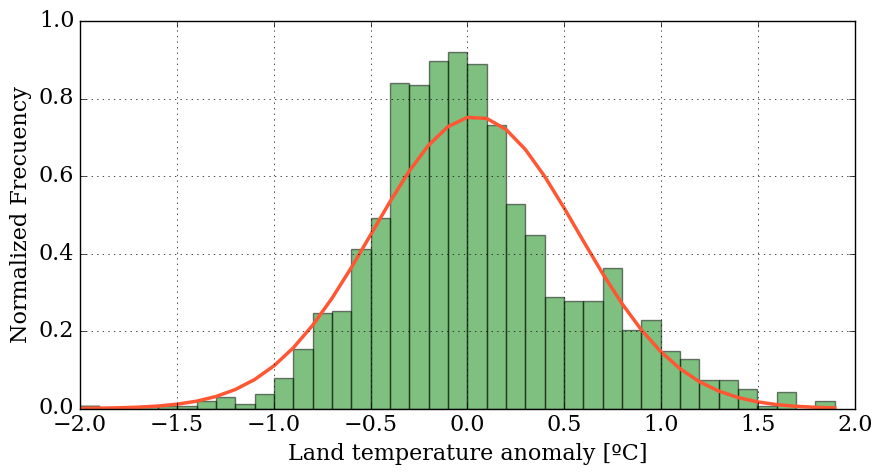

In [108]:
bins = numpy.linspace(min(T_land[:,1]), max(T_land[:,1]), 40)

pyplot.figure(figsize = (10,5))

#Plot the histogram
pyplot.hist(T_land[:,1], bins, normed = True, color = 'g', alpha = 0.5)

#Plot the probability density function 
pyplot.plot(bins, stats.norm.pdf(bins, mean_T, sigma_T), color='#ff5733', ls = '-', lw = 2.5)

pyplot.xlabel('Land temperature anomaly [ºC]')
pyplot.ylabel('Normalized Frecuency')
pyplot.grid();

## Two plots in the same figure

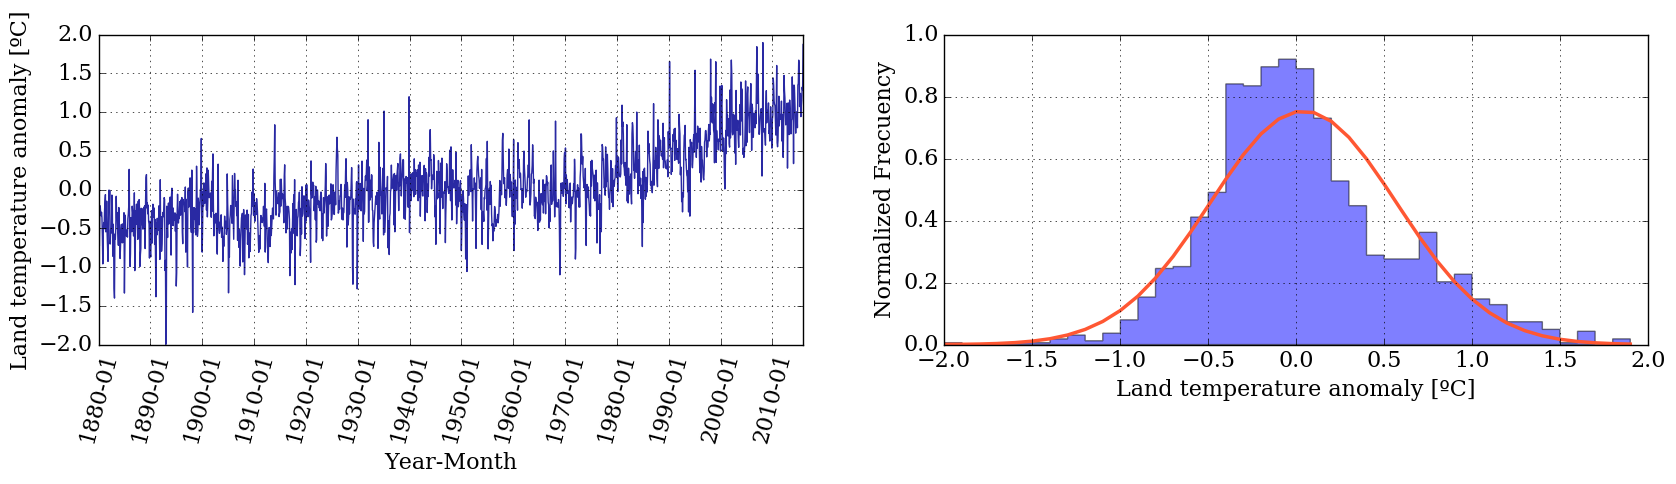

In [114]:
pyplot.figure(figsize = (20,4))

#First plot
pyplot.subplot(121) #creates a grid of 1 row, 2 columns and select the first plot

pyplot.xticks(dummy[::12*10], date[::12*10], rotation = 75)
pyplot.plot(dummy, T_land[:,1], color = '#2929a3', linestyle = '-', linewidth = 1)
#pyplot.title('Land global temperature anomalies. \n')
pyplot.xlabel('Year-Month')
pyplot.ylabel('Land temperature anomaly [ºC]')
pyplot.grid()

#Second plot
pyplot.subplot(122) #creates a grid of 1 row, 2 columns and select the first plot

#Plot the histogram
pyplot.hist(T_land[:,1], bins, normed = True, color = 'b', alpha = 0.5, histtype='stepfilled')

#Plot the probability density function 
pyplot.plot(bins, stats.norm.pdf(bins, mean_T, sigma_T), color='#ff5733', ls = '-', lw = 2.5)

pyplot.xlabel('Land temperature anomaly [ºC]')
pyplot.ylabel('Normalized Frecuency')
pyplot.grid();


## Smooth the data

In [115]:
def smooth_data(N, data):
    """
    Returns smoothed data using a sliding_moving average.
    
    Arguments:
    -------------
    N (int)       : amount of data values we want to average
    data (array)  : array of data we want to smooth.
    
    Returns:
    -------------
    smooth (array): array with smoothed data.
    """
    
    window = numpy.ones(N)/N
    smooth = numpy.convolve(data, window, 'same')
    
    return smooth

In [116]:
? smooth_data

In [117]:
smooth = smooth_data(12, T_land[:,1])

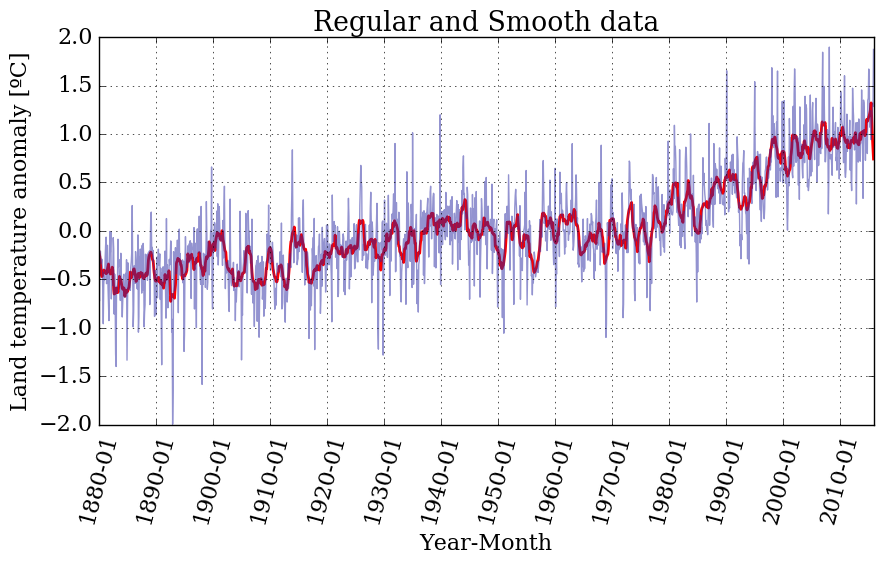

In [123]:
pyplot.figure(figsize=(10,5))

pyplot.xticks(dummy[::12*10], date[::12*10], rotation = 75)
#Regular data plot
pyplot.plot(dummy, T_land[:,1], color = '#2929a3', linestyle = '-', linewidth = 1, alpha = 0.5)
#Smooth data plot
pyplot.plot(dummy, smooth, color = 'r', linestyle = '-', linewidth = 2)

pyplot.title('Regular and Smooth data')
pyplot.xlabel('Year-Month')
pyplot.ylabel('Land temperature anomaly [ºC]')
pyplot.grid();
